# Introduction

The objective of this notebook is to demonstrate abilities to analyze data from raw datasets. Using the data from the Movie Database (TMDb), I will attempt to demonstrate the ability to formulate questions, and using python code to analyze the data available to answer the questions, as well as communicate my findings.

In [1]:
#import IPython
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df_raw = pd.read_csv('tmdb-movies.csv')
df_raw.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [ ]:
df_raw.info()

### Cleaning the Data for Further Investigations

In [2]:
#drop irrelevant columns
df_raw.drop(['id', 'imdb_id', 'homepage', 'tagline', 'overview'], axis=1, inplace=True)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
keywords                9373 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(7)
memory usage: 1.3+ MB


In [3]:
#investigate some columns
print(type(df_raw['release_date'][0]))

<class 'str'>


In [4]:
#convert release_date column to datetime
df_raw['release_date']=pd.to_datetime(df_raw['release_date'])
type(df_raw['release_date'][0])
df_raw.head(1)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


In [5]:
#find duplicates
sum(df_raw.duplicated())

1

In [6]:
#drop duplicates
df_raw.drop_duplicates(inplace=True)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
keywords                9372 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(6)
memory usage: 1.4+ MB


Given that the genres column offer a lot of information that we'd like analyze individually, we will attempt to separate the data into new columns

In [7]:
#splitting up genres into columns
df_raw = df_raw.join(df_raw['genres'].str.split('|', expand=True).add_prefix('genre'))
df_raw.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre0,genre1,genre2,genre3,genre4
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,...,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,...,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,...,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None


In [8]:
#Create columns for each genre

df_raw['Drama'] = ""
df_raw['Music'] = ""
df_raw['Action'] = ""
df_raw['Adventure'] = ""
df_raw['Comedy'] = ""
df_raw['Animation'] = ""
df_raw['Family'] = ""
df_raw['Science Fiction'] = ""
df_raw['Thriller'] = ""
df_raw['Mystery'] = ""
df_raw['Documentary'] = ""
df_raw['Crime'] = ""
df_raw['War'] = ""
df_raw['TV Movie'] = ""
df_raw['Horror'] = ""
df_raw['Romance'] = ""
df_raw['Foreign'] = ""
df_raw['Fantasy'] = ""
df_raw['Western'] = ""

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 40 columns):
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
keywords                9372 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
genre0                  10842 non-null object
genre1                  8514 non-null object
genre2                  5078 non-null object
genre3        

In [9]:
#Sort out the genres as applicable to each film in the dataframe

def drama_sel(df_raw):
    if(df_raw['genre0'] == 'Drama'):
        return 'Drama'
    elif(df_raw['genre1'] == 'Drama'):
        return 'Drama'
    elif(df_raw['genre2'] == 'Drama'):
        return 'Drama'
    elif(df_raw['genre3'] == 'Drama'):
        return 'Drama'
    elif(df_raw['genre4'] == 'Drama'):
        return 'Drama'

df_raw['Drama'] = df_raw.apply(drama_sel, axis=1)
print( 'Drama: ', df_raw['Drama'].value_counts())

def action_sel(df_raw):
    if(df_raw['genre0'] == 'Action'):
        return 'Action'
    elif(df_raw['genre1'] == 'Action'):
        return 'Action'
    elif(df_raw['genre2'] == 'Action'):
        return 'Action'
    elif(df_raw['genre3'] == 'Action'):
        return 'Action'
    elif(df_raw['genre4'] == 'Action'):
        return 'Action'

df_raw['Action'] = df_raw.apply(action_sel, axis=1)
print('Action: ', df_raw['Action'].value_counts())

def music_sel(df_raw):
    if(df_raw['genre0'] == 'Music'):
        return 'Music'
    elif(df_raw['genre1'] == 'Music'):
        return 'Music'
    elif(df_raw['genre2'] == 'Music'):
        return 'Music'
    elif(df_raw['genre3'] == 'Music'):
        return 'Music'
    elif(df_raw['genre4'] == 'Music'):
        return 'Music'

df_raw['Music'] = df_raw.apply(music_sel, axis=1)
print('Music: ', df_raw['Music'].value_counts())

def adv_sel(df_raw):
    if(df_raw['genre0'] == 'Adventure'):
        return 'Adventure'
    elif(df_raw['genre1'] == 'Adventure'):
        return 'Adventure'
    elif(df_raw['genre2'] == 'Adventure'):
        return 'Adventure'
    elif(df_raw['genre3'] == 'Adventure'):
        return 'Adventure'
    elif(df_raw['genre4'] == 'Adventure'):
        return 'Adventure'

df_raw['Adventure'] = df_raw.apply(adv_sel, axis=1)
print('Adventure: ', df_raw['Adventure'].value_counts())

def com_sel(df_raw):
    if(df_raw['genre0'] == 'Comedy'):
        return 'Comedy'
    elif(df_raw['genre1'] == 'Comedy'):
        return 'Comedy'
    elif(df_raw['genre2'] == 'Comedy'):
        return 'Comedy'
    elif(df_raw['genre3'] == 'Comedy'):
        return 'Comedy'
    elif(df_raw['genre4'] == 'Comedy'):
        return 'Comedy'

df_raw['Comedy'] = df_raw.apply(com_sel, axis=1)
print('Comedy: ', df_raw['Comedy'].value_counts())

def ani_sel(df_raw):
    if(df_raw['genre0'] == 'Animation'):
        return 'Animation'
    elif(df_raw['genre1'] == 'Animation'):
        return 'Animation'
    elif(df_raw['genre2'] == 'Animation'):
        return 'Animation'
    elif(df_raw['genre3'] == 'Animation'):
        return 'Animation'
    elif(df_raw['genre4'] == 'Animation'):
        return 'Animation'

df_raw['Animation'] = df_raw.apply(ani_sel, axis=1)
print('Animation: ', df_raw['Animation'].value_counts())

def fam_sel(df_raw):
    if(df_raw['genre0'] == 'Family'):
        return 'Family'
    elif(df_raw['genre1'] == 'Family'):
        return 'Family'
    elif(df_raw['genre2'] == 'Family'):
        return 'Family'
    elif(df_raw['genre3'] == 'Family'):
        return 'Family'
    elif(df_raw['genre4'] == 'Family'):
        return 'Family'

df_raw['Family'] = df_raw.apply(fam_sel, axis=1)
print('Family: ', df_raw['Family'].value_counts())

def scifi_sel(df_raw):
    if(df_raw['genre0'] == 'Science Fiction'):
        return 'Science Fiction'
    elif(df_raw['genre1'] == 'Science Fiction'):
        return 'Science Fiction'
    elif(df_raw['genre2'] == 'Science Fiction'):
        return 'Science Fiction'
    elif(df_raw['genre3'] == 'Science Fiction'):
        return 'Science Fiction'
    elif(df_raw['genre4'] == 'Science Fiction'):
        return 'Science Fiction'

df_raw['Science Fiction'] = df_raw.apply(scifi_sel, axis=1)
print('Science Fiction: ', df_raw['Science Fiction'].value_counts())

def thr_sel(df_raw):
    if(df_raw['genre0'] == 'Thriller'):
        return 'Thriller'
    elif(df_raw['genre1'] == 'Thriller'):
        return 'Thriller'
    elif(df_raw['genre2'] == 'Thriller'):
        return 'Thriller'
    elif(df_raw['genre3'] == 'Thriller'):
        return 'Thriller'
    elif(df_raw['genre4'] == 'Thriller'):
        return 'Thriller'

df_raw['Thriller'] = df_raw.apply(thr_sel, axis=1)
print('Thriller: ', df_raw['Thriller'].value_counts())

def mys_sel(df_raw):
    if(df_raw['genre0'] == 'Mystery'):
        return 'Mystery'
    elif(df_raw['genre1'] == 'Mystery'):
        return 'Mystery'
    elif(df_raw['genre2'] == 'Mystery'):
        return 'Mystery'
    elif(df_raw['genre3'] == 'Mystery'):
        return 'Mystery'
    elif(df_raw['genre4'] == 'Mystery'):
        return 'Mystery'

df_raw['Mystery'] = df_raw.apply(mys_sel, axis=1)
print('Mystery: ', df_raw['Mystery'].value_counts())

def doc_sel(df_raw):
    if(df_raw['genre0'] == 'Documentary'):
        return 'Documentary'
    elif(df_raw['genre1'] == 'Documentary'):
        return 'Documentary'
    elif(df_raw['genre2'] == 'Documentary'):
        return 'Documentary'
    elif(df_raw['genre3'] == 'Documentary'):
        return 'Documentary'
    elif(df_raw['genre4'] == 'Documentary'):
        return 'Documentary'

df_raw['Documentary'] = df_raw.apply(doc_sel, axis=1)
print('Documentary: ', df_raw['Documentary'].value_counts())

def crime_sel(df_raw):
    if(df_raw['genre0'] == 'Crime'):
        return 'Crime'
    elif(df_raw['genre1'] == 'Crime'):
        return 'Crime'
    elif(df_raw['genre2'] == 'Crime'):
        return 'Crime'
    elif(df_raw['genre3'] == 'Crime'):
        return 'Crime'
    elif(df_raw['genre4'] == 'Crime'):
        return 'Crime'

df_raw['Crime'] = df_raw.apply(crime_sel, axis=1)
print('Crime: ', df_raw['Crime'].value_counts())

def war_sel(df_raw):
    if(df_raw['genre0'] == 'War'):
        return 'War'
    elif(df_raw['genre1'] == 'War'):
        return 'War'
    elif(df_raw['genre2'] == 'War'):
        return 'War'
    elif(df_raw['genre3'] == 'War'):
        return 'War'
    elif(df_raw['genre4'] == 'War'):
        return 'War'

df_raw['War'] = df_raw.apply(war_sel, axis=1)
print('War: ', df_raw['War'].value_counts())

def tvm_sel(df_raw):
    if(df_raw['genre0'] == 'TV Movie'):
        return 'TV Movie'
    elif(df_raw['genre1'] == 'TV Movie'):
        return 'TV Movie'
    elif(df_raw['genre2'] == 'TV Movie'):
        return 'TV Movie'
    elif(df_raw['genre3'] == 'TV Movie'):
        return 'TV Movie'
    elif(df_raw['genre4'] == 'TV Movie'):
        return 'TV Movie'

df_raw['TV Movie'] = df_raw.apply(tvm_sel, axis=1)
print('TV Movie: ', df_raw['TV Movie'].value_counts())

def horror_sel(df_raw):
    if(df_raw['genre0'] == 'Horror'):
        return 'Horror'
    elif(df_raw['genre1'] == 'Horror'):
        return 'Horror'
    elif(df_raw['genre2'] == 'Horror'):
        return 'Horror'
    elif(df_raw['genre3'] == 'Horror'):
        return 'Horror'
    elif(df_raw['genre4'] == 'Horror'):
        return 'Horror'

df_raw['Horror'] = df_raw.apply(horror_sel, axis=1)
print('Horror: ', df_raw['Horror'].value_counts())


def rom_sel(df_raw):
    if(df_raw['genre0'] == 'Romance'):
        return 'Romance'
    elif(df_raw['genre1'] == 'Romance'):
        return 'Romance'
    elif(df_raw['genre2'] == 'Romance'):
        return 'Romance'
    elif(df_raw['genre3'] == 'Romance'):
        return 'Romance'
    elif(df_raw['genre4'] == 'Romance'):
        return 'Romance'

df_raw['Romance'] = df_raw.apply(rom_sel, axis=1)
print('Romance: ', df_raw['Romance'].value_counts())

def for_sel(df_raw):
    if(df_raw['genre0'] == 'Foreign'):
        return 'Foreign'
    elif(df_raw['genre1'] == 'v'):
        return 'Foreign'
    elif(df_raw['genre2'] == 'Foreign'):
        return 'Foreign'
    elif(df_raw['genre3'] == 'Foreign'):
        return 'Foreign'
    elif(df_raw['genre4'] == 'Foreign'):
        return 'Foreign'

df_raw['Foreign'] = df_raw.apply(for_sel, axis=1)
print('Foreign: ', df_raw['Foreign'].value_counts())

def fant_sel(df_raw):
    if(df_raw['genre0'] == 'Fantasy'):
        return 'Fantasy'
    elif(df_raw['genre1'] == 'Fantasy'):
        return 'Fantasy'
    elif(df_raw['genre2'] == 'Fantasy'):
        return 'Fantasy'
    elif(df_raw['genre3'] == 'Fantasy'):
        return 'Fantasy'
    elif(df_raw['genre4'] == 'Fantasy'):
        return 'Fantasy'

df_raw['Fantasy'] = df_raw.apply(fant_sel, axis=1)
print('Fantasy: ', df_raw['Fantasy'].value_counts())

def west_sel(df_raw):
    if(df_raw['genre0'] == 'Western'):
        return 'Western'
    elif(df_raw['genre1'] == 'Western'):
        return 'Western'
    elif(df_raw['genre2'] == 'Western'):
        return 'Western'
    elif(df_raw['genre3'] == 'Western'):
        return 'Western'
    elif(df_raw['genre4'] == 'Western'):
        return 'Western'

df_raw['Western'] = df_raw.apply(west_sel, axis=1)
print('Western: ', df_raw['Western'].value_counts())
#df_raw.tail(20)

        

Drama:  Drama    4760
Name: Drama, dtype: int64
Action:  Action    2384
Name: Action, dtype: int64
Music:  Music    408
Name: Music, dtype: int64
Adventure:  Adventure    1471
Name: Adventure, dtype: int64
Comedy:  Comedy    3793
Name: Comedy, dtype: int64
Animation:  Animation    699
Name: Animation, dtype: int64
Family:  Family    1231
Name: Family, dtype: int64
Science Fiction:  Science Fiction    1229
Name: Science Fiction, dtype: int64
Thriller:  Thriller    2907
Name: Thriller, dtype: int64
Mystery:  Mystery    810
Name: Mystery, dtype: int64
Documentary:  Documentary    520
Name: Documentary, dtype: int64
Crime:  Crime    1354
Name: Crime, dtype: int64
War:  War    270
Name: War, dtype: int64
TV Movie:  TV Movie    167
Name: TV Movie, dtype: int64
Horror:  Horror    1637
Name: Horror, dtype: int64
Romance:  Romance    1712
Name: Romance, dtype: int64
Foreign:  Foreign    126
Name: Foreign, dtype: int64
Fantasy:  Fantasy    916
Name: Fantasy, dtype: int64
Western:  Western    165

In [10]:
#drop uneeded columns
df_raw.drop(['genre0', 'genre1', 'genre2', 'genre3', 'genre4'], axis=1, inplace=True)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 35 columns):
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
keywords                9372 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
Drama                   4760 non-null object
Music                   408 non-null object
Action                  2384 non-null object
Adventure       

In [11]:
#We consider this dataset clean
df = df_raw


Now that we have a clean data set, we will attempt to answer the following:
    1. What are the most profitable movies of each year
    2. What are the charatersitics of the profitable movies?
    3. What are the most profitable generes of each year?

## Q1. What are the most profitable movies of each year?

To evaluate profitability, we find the difference between the revenue generated by the movie and the budget

In [12]:
#create a new column with the difference between revenue and budget
df['profit'] = df['revenue'] - df['budget']
print(df.shape)
df.head(2)

(10865, 36)


,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,...,Documentary,Crime,War,TV Movie,Horror,Romance,Foreign,Fantasy,Western,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,...,None,None,None,None,None,None,None,None,None,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,...,None,None,None,None,None,None,None,None,None,228436354


In [13]:
#create a dataframe (df_max_profit) to include the maximum profit value by year
df_max_profit = df.groupby('release_year', as_index = False).profit.max()
df_max_profit.head()

,release_year,profit
0,1960,48000000
1,1961,211880014
2,1962,58500000
3,1963,76398765
4,1964,121400000


In [14]:
#create a new dataframe (yearly_max) to include the movie with the highest profit value by year
labels = df.columns
labels
yearly_max = pd.DataFrame(columns = labels)
yearly_max

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,...,Documentary,Crime,War,TV Movie,Horror,Romance,Foreign,Fantasy,Western,profit


In [15]:
#Filter through df dataframe with values in df_max_profit dataframe

for i in df_max_profit.index:
    h_profit = df[(df['profit'] == df_max_profit.profit[i]) & (df['release_year'] ==  df_max_profit.release_year[i])]
    yearly_max = yearly_max.append(h_profit, ignore_index=True)

print('size of df:', yearly_max.shape[0])
yearly_max.head()

size of df: 56


,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,...,Documentary,Crime,War,TV Movie,Horror,Romance,Foreign,Fantasy,Western,profit
0,1.136943,12000000,60000000,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,gladiator|roman empire|gladiator fight|slavery...,197,Action|Drama|History,Bryna Productions,...,None,None,None,None,None,None,None,None,None,48000000
1,2.631987,4000000,215880014,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,puppy|animation|dog|dalmatian,79,Adventure|Animation|Comedy|Family,Walt Disney Productions,...,None,None,None,None,None,None,None,None,None,211880014
2,3.170651,1100000,59600000,Dr. No,Sean Connery|Ursula Andress|Joseph Wiseman|Jac...,Terence Young,london|england|assassination|spy|casino,110,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),...,None,None,None,None,None,None,None,None,None,58500000
3,2.508235,2500000,78898765,From Russia With Love,Sean Connery|Daniela Bianchi|Lotte Lenya|Rober...,Terence Young,venice|london|terror|england|assassination,115,Action|Thriller|Adventure,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,...,None,None,None,None,None,None,None,None,None,76398765
4,3.153791,3500000,124900000,Goldfinger,Sean Connery|Honor Blackman|Gert FrÃ¶be|Shirle...,Guy Hamilton,secret organization|secret intelligence servic...,110,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),...,None,None,None,None,None,None,None,None,None,121400000


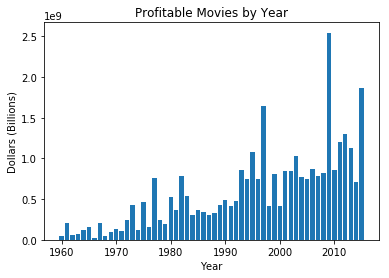

In [16]:
# Visualize the most profitable movies of each year
plt.bar(yearly_max['release_year'], yearly_max['profit'])
plt.title("Profitable Movies by Year")
plt.xlabel("Year")
plt.ylabel("Dollars (Billions)");

In [17]:
#Most profitable movie on record
most_profit = yearly_max[yearly_max['profit'] == yearly_max.profit.max()]
most_profit

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,...,Documentary,Crime,War,TV Movie,Horror,Romance,Foreign,Fantasy,Western,profit
49,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,...,None,None,None,None,None,None,None,Fantasy,None,2544505847


## Q2. What are the characteristics of the most successful movies?

To evaluate the the movies that are considered most successful, we assume that any movie above the mean revenue for a particular year is considered to be a successful movie. This is irrespective of the profitability of the movie

In [18]:
#Evaluate the mean revenue of movies per year
yearly_revenue_mean = df.groupby('release_year', as_index=False).revenue.mean()
yearly_revenue_mean.tail()


,release_year,revenue
51,2011,4.388073e+07
52,2012,4.195311e+07
53,2013,3.748654e+07
54,2014,3.475879e+07
55,2015,4.254762e+07


In [19]:
#filter through df dataframe to select all successful movies
labels = df.columns
labels
success = pd.DataFrame(columns = labels)

for i in yearly_revenue_mean.index:
    over_avg = df[(df['release_year'] == yearly_revenue_mean.release_year[i]) & (df['revenue'] > yearly_revenue_mean.revenue[i])]
    success = success.append(over_avg, ignore_index=True)
    
success.head()
#success.info()
    

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,...,Documentary,Crime,War,TV Movie,Horror,Romance,Foreign,Fantasy,Western,profit
0,2.610362,806948,32000000,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,Shamley Productions,...,None,None,None,None,Horror,None,None,None,None,31193052
1,1.872132,2000000,4905000,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,John Sturges,horse|village|friendship|remake|number in title,128,Action|Adventure|Western,The Mirisch Corporation|Alpha Productions,...,None,None,None,None,None,None,None,None,Western,2905000
2,1.136943,12000000,60000000,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,gladiator|roman empire|gladiator fight|slavery...,197,Action|Drama|History,Bryna Productions,...,None,None,None,None,None,None,None,None,None,48000000
3,0.947307,3000000,25000000,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,new york|new year's eve|lovesickness|age diffe...,125,Comedy|Drama|Romance,United Artists|The Mirisch Company,...,None,None,None,None,None,Romance,None,None,None,22000000
4,0.390240,0,6000000,The Grass Is Greener,Cary Grant|Deborah Kerr|Robert Mitchum|Jean Si...,Stanley Donen,cheating husband|millionaire|oil tycoon,104,Comedy|Drama|Romance,Grandon Productions,...,None,None,None,None,None,Romance,None,None,None,6000000


In order to analyze the ost successful genres, we shall attempt to

In [20]:
genres = success.iloc[:, 16:35]
#genres.query('Drama == "Drama"')
genres.head()
#genres.info()

,Drama,Music,Action,Adventure,Comedy,Animation,Family,Science Fiction,Thriller,Mystery,Documentary,Crime,War,TV Movie,Horror,Romance,Foreign,Fantasy,Western
0,Drama,None,None,None,None,None,None,None,Thriller,None,None,None,None,None,Horror,None,None,None,None
1,None,None,Action,Adventure,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Western
2,Drama,None,Action,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,Drama,None,None,None,Comedy,None,None,None,None,None,None,None,None,None,None,Romance,None,None,None
4,Drama,None,None,None,Comedy,None,None,None,None,None,None,None,None,None,None,Romance,None,None,None


In [21]:
genre_count = []
for i in genres.columns:
    genre_count.append(sum(genres[i].value_counts()))
genre_count

[883,
 74,
 735,
 573,
 838,
 159,
 340,
 330,
 672,
 182,
 7,
 369,
 77,
 1,
 212,
 365,
 1,
 290,
 34]

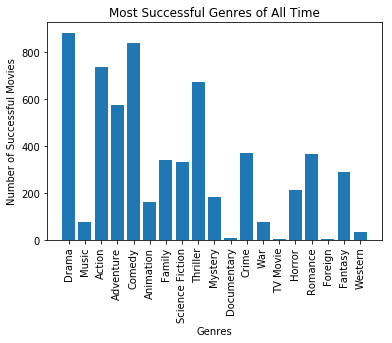

In [23]:
#Visualize most successful genres
plt.bar(genres.columns, genre_count)
plt.title("Most Successful Genres of All Time")
plt.xlabel("Genres")
plt.ylabel("Number of Successful Movies")
plt.xticks(rotation=90);